# We Import the necessary modules that will be used in this analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Reading the CSV file in pandas
data=pd.read_csv("C:\\Users\\user\\Desktop\\SalesAnalysis\\WALMART_SALES_DATA.csv")
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [24]:
data.describe()#finding a numerical summary of the data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [25]:
data.info() #finding datatypes of the columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [27]:
#Lets find stores with many sales
store_sales=data.groupby("Store")["Weekly_Sales"].sum().round().sort_values(ascending=False).reset_index(name="Store_Sales")
store_sales

,Store,Store_Sales
0,20,301397792.0
1,4,299543953.0
2,14,288999911.0
3,13,286517704.0
4,2,275382441.0
5,10,271617714.0
6,27,253855917.0
7,6,223756131.0
8,1,222402809.0
9,39,207445542.0


# The store number 20 is the store with most sales while store number 33 is the store with very few sales

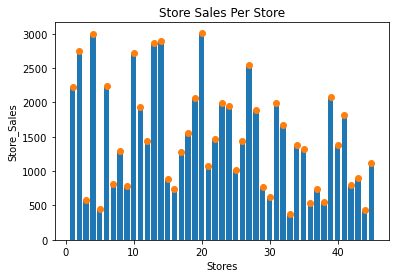

In [21]:
#lets plot a bar chart for store sales
plt.bar(store_sales["Store"],store_sales["Store_Sales"]/100000)
plt.scatter(store_sales["Store"],store_sales["Store_Sales"]/100000)
plt.xlabel("Stores")
plt.ylabel("Store_Sales")
plt.title("Store Sales Per Store")
plt.show()

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [29]:
data.isnull().sum() #no missing values from the data

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [32]:
data.duplicated().sum() #no duplicate rows in the dataset

0

In [34]:
data.max() #checking for maximum values in the dataset

Store                   45
Date            31-12-2010
Weekly_Sales    3818686.45
Holiday_Flag             1
Temperature         100.14
Fuel_Price           4.468
CPI             227.232807
Unemployment        14.313
dtype: object

# Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [68]:
sales_std=data.groupby("Store")["Weekly_Sales"].agg("std").reset_index().sort_values(by="Weekly_Sales",ascending=False)
sales_std.rename(columns={"Weekly_Sales":"Standard Deviation"},inplace=True)
sales_mean=data.groupby("Store")["Weekly_Sales"].agg("mean").round().reset_index()
sales_mean.rename(columns={"Weekly_Sales":"Mean"},inplace=True)
sales_std["Variation"]=(sales_std["Standard Deviation"]/sales_mean["Mean"])*100
sales_std["Variation"]=round(sales_std["Variation"],2)
pd.merge(sales_std,sales_mean).head(5)


,Store,Standard Deviation,Variation,Mean
0,14,317569.949476,15.71,2020978.0
1,10,302262.062504,15.91,1899425.0
2,20,275900.562742,13.09,2107677.0
3,4,266201.442297,12.71,2094713.0
4,13,265506.995776,13.25,2003620.0


# Store 14 has the maximum standard deviation,whereas store 1 has the largest mean

In [97]:
#changing the datatype of the column date so that we can calculate the store performance on 3rd quarter
data["Date"]=pd.to_datetime(data["Date"])
Q3_2012=data[(data["Date"] >= "2012-07-01") & (data["Date"] <= "2012-09-30")].reset_index(drop=True)
Q3_2012.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2012-07-06,1769854.16,0,81.57,3.227,221.883779,6.908
1,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908
2,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908
3,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908
4,1,2012-08-03,1631135.79,0,86.11,3.417,221.949864,6.908


In [102]:
#Store performance for the 3rd quarter
store_performance=Q3_2012.groupby("Store")["Weekly_Sales"].agg("sum").sort_values(ascending=False).reset_index()
store_performance.head()

,Store,Weekly_Sales
0,4,27796792.46
1,20,26891526.98
2,13,26421259.30
3,2,24303354.86
4,10,23037258.76


# Store 4 performed well in quarter 3

In [109]:
Q2_2012=data[(data["Date"]>="2012-04-01") & (data["Date"]<="2012-06-30")].reset_index(drop=True)
store_performance2=Q2_2012.groupby("Store")["Weekly_Sales"].agg("sum").sort_values(ascending=False).reset_index()
store_performance2.head()

,Store,Weekly_Sales
0,4,28454363.67
1,20,27524197.32
2,13,27009207.14
3,14,25155535.41
4,2,25083604.88


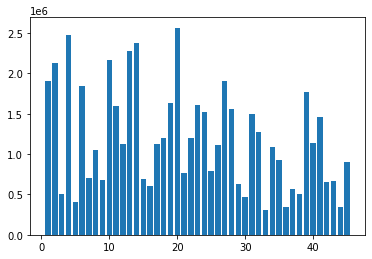

In [111]:
plt.bar(Q2_2012["Store"],Q2_2012["Weekly_Sales"])
plt.show()

# store also performed well in quarter 2

In [112]:
#Adding new columns to the data
#Adding Month column to the dataset
data["Month"]=data["Date"].dt.month

In [114]:
#Adding Year column to the dataset
data["Year"]=data["Date"].dt.year

In [115]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010


# finding total sales per year

In [137]:
sales_per_year=data.groupby("Year")["Weekly_Sales"].agg("sum").reset_index(name="Year Sales").sort_values(by="Year Sales",ascending=False)
sales_per_year

,Year,Year Sales
1,2011,2.448200e+09
0,2010,2.288886e+09
2,2012,2.000133e+09


Year 2011was the year with a lot of sales compared to other years

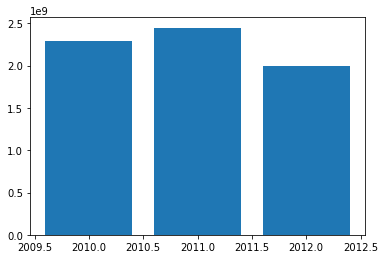

In [135]:
#plot the years sales on a bar chart
plt.bar(sales_per_year["Year"],sales_per_year["Year Sales"])
plt.show()